In [3]:
!pip install symbulate

# Introduction

In [1]:
%matplotlib inline

In [2]:
from symbulate import *

In [3]:
import matplotlib
import matplotlib.pyplot as plt

0,2
1,3
2,1
3,4
4,1
5,3
6,2
7,2
8,0
...,...
9999,0


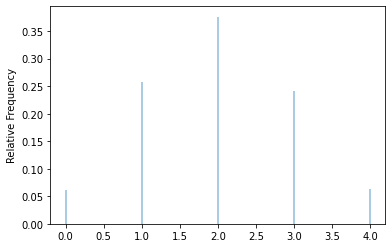

In [4]:
x = RV(Binomial(4, 0.5)).sim(10000)

x.plot()

x

5 3


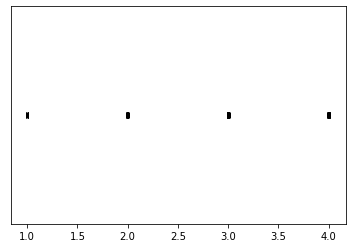

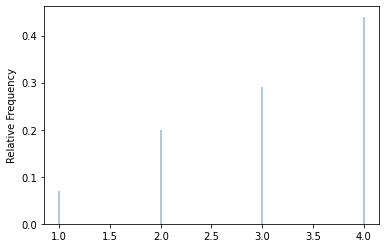

In [5]:
P2 = BoxModel([1, 2, 3, 4], size = 2, replace = True)
P2.sim(10)
X2 = RV(P2, sum)
Y2 = RV(P2, max)
omega = (3, 2)  # a pair of rolls
print(X2(omega), Y2(omega))
y2 = Y2.sim(100)
y2
y2.tabulate()
y2.tabulate(normalize = True)
Y2.sim(100).tabulate(normalize = True)
y2.plot('rug')
plt.show()
y2.plot()
plt.show()

In [11]:
P = BoxModel([1, 2, 3, 4], size = 2, replace = True)

In [12]:
P.sim(10)

0,"(3, 4)"
1,"(4, 3)"
2,"(4, 3)"
3,"(1, 1)"
4,"(2, 1)"
5,"(4, 4)"
6,"(1, 2)"
7,"(4, 2)"
8,"(4, 1)"
...,...
9,"(1, 2)"


In [13]:
X = RV(P, sum)
Y = RV(P, max)

In [14]:
omega = (3, 2)  # a pair of rolls
print(X(omega), Y(omega))

5 3


In [15]:
y = Y.sim(100)
y

0,3
1,4
2,2
3,4
4,4
5,3
6,4
7,4
8,4
...,...
99,2


In [16]:
y.tabulate()

1,5
2,15
3,24
4,56
Total,100


In [17]:
y.tabulate(normalize = True)

1,0.05
2,0.15
3,0.24
4,0.56
Total,1.0


In [18]:
Y.sim(100).tabulate(normalize = True)

1,0.05
2,0.18
3,0.38
4,0.39
Total,1.0


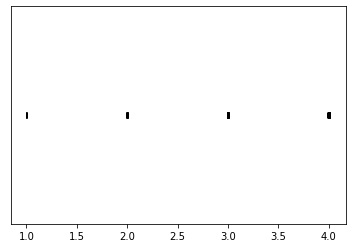

In [19]:
y.plot('rug')
plt.show()

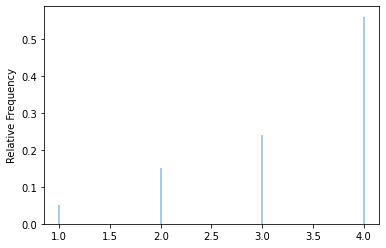

In [20]:
y.plot()
plt.show()

In [21]:
y = Y.sim(10000)
y.tabulate()

1,645
2,1867
3,3069
4,4419
Total,10000


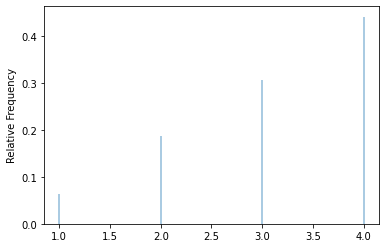

In [22]:
y.plot()
plt.show()

In [23]:
x = X.sim(10000)
x.tabulate(normalize = True)

2,0.0621
3,0.1264
4,0.1831
5,0.2507
6,0.1909
7,0.1219
8,0.0649
Total,1.0


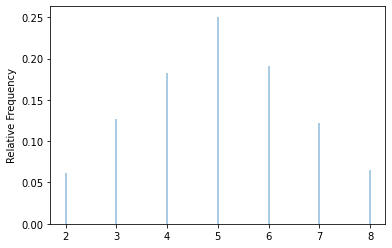

In [24]:
x.plot()
plt.show()

In [25]:
y.sum() / 10000

3.1262

In [26]:
y.sum() / y.count()

3.1262

In [27]:
y.mean()

3.1262

In [28]:
x.mean()


5.0072

In [29]:
A = (Y < 3) # an event

In [30]:
A.sim(10)

0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
...,...
9,False


In [31]:
(Y == 3).sim(10000).tabulate()

False,6909
True,3091
Total,10000


In [32]:
xy = (X & Y).sim(100)
xy

0,"(6, 4)"
1,"(3, 2)"
2,"(5, 3)"
3,"(4, 3)"
4,"(7, 4)"
5,"(7, 4)"
6,"(5, 4)"
7,"(4, 2)"
8,"(2, 1)"
...,...
99,"(5, 3)"


In [33]:
xy.tabulate()

"(2, 1)",5
"(3, 2)",12
"(4, 2)",11
"(4, 3)",15
"(5, 3)",14
"(5, 4)",12
"(6, 3)",2
"(6, 4)",9
"(7, 4)",12
"(8, 4)",8
Total,100


In [34]:
xy.tabulate(normalize = True)

"(2, 1)",0.05
"(3, 2)",0.12
"(4, 2)",0.11
"(4, 3)",0.15
"(5, 3)",0.14
"(5, 4)",0.12
"(6, 3)",0.02
"(6, 4)",0.09
"(7, 4)",0.12
"(8, 4)",0.08
Total,1.0


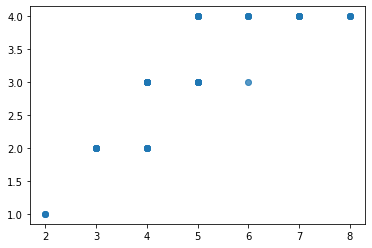

In [35]:
xy.plot()
plt.show()

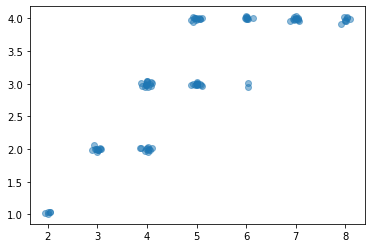

In [36]:
xy.plot(jitter = True)
plt.show()

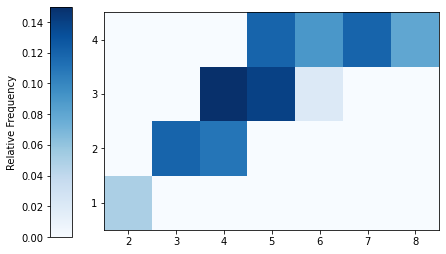

In [37]:
xy.plot('tile')
plt.show()

# Markov Chains

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess

In [8]:
df = pd.read_csv('lungcancer.csv')

In [9]:
df

,Adrenal,Anus,Appendix,Bile Duct,Bladder,Bone,Brain,Branchial Cyst,Breast,Cervix,...,Spleen,Stomach,Testes,Thyroid,Tongue,Tonsil,Unknown,Uterus,Vagina,Vulva
0,0.092919,0.0,0.0,0.0,0.001782,0.061626,0.023036,0.0,0.0,0.0,...,0.028626,0.007890,0.0,0.023737,0.0,0.0,0.0,0.001696,0.001723,0.0
1,0.092099,0.0,0.0,0.0,0.001991,0.061581,0.023382,0.0,0.0,0.0,...,0.028609,0.007931,0.0,0.023444,0.0,0.0,0.0,0.001993,0.001786,0.0
2,0.092203,0.0,0.0,0.0,0.001938,0.061566,0.023669,0.0,0.0,0.0,...,0.028431,0.007928,0.0,0.023541,0.0,0.0,0.0,0.001999,0.001806,0.0
3,0.092182,0.0,0.0,0.0,0.001924,0.061573,0.023749,0.0,0.0,0.0,...,0.028586,0.008029,0.0,0.022955,0.0,0.0,0.0,0.001931,0.001741,0.0
4,0.091933,0.0,0.0,0.0,0.002008,0.061596,0.023187,0.0,0.0,0.0,...,0.028718,0.008029,0.0,0.023247,0.0,0.0,0.0,0.001976,0.001765,0.0
5,0.092668,0.0,0.0,0.0,0.001823,0.061551,0.023321,0.0,0.0,0.0,...,0.028309,0.008061,0.0,0.023839,0.0,0.0,0.0,0.002014,0.001709,0.0
6,0.091703,0.0,0.0,0.0,0.001890,0.061522,0.022996,0.0,0.0,0.0,...,0.028751,0.008000,0.0,0.023826,0.0,0.0,0.0,0.002032,0.001743,0.0
7,0.092209,0.0,0.0,0.0,0.002007,0.061500,0.023295,0.0,0.0,0.0,...,0.028694,0.007992,0.0,0.023486,0.0,0.0,0.0,0.002081,0.001795,0.0
8,0.091634,0.0,0.0,0.0,0.001961,0.061643,0.023331,0.0,0.0,0.0,...,0.028461,0.007948,0.0,0.023646,0.0,0.0,0.0,0.001959,0.001734,0.0
9,0.092629,0.0,0.0,0.0,0.002169,0.061669,0.023555,0.0,0.0,0.0,...,0.028523,0.007966,0.0,0.023506,0.0,0.0,0.0,0.002070,0.001765,0.0


In [73]:
states = ["Ln..reg.", "Ln..dist.", "Liver", "Adrenal", "Lung", "Bone", "Kidney", "Pleura", "Pancreas", "Spleen", "Heart", "Thyroid", "Brain", "Pericardium", "Diaphragm", "Lg.Intestine
]

TransitionMatrix = [[0.295,0.119,0.080,0.132,0.052,0.059,0.067,0.047,0.047,0.034,0.036,0.032,0.023,0.027,0.022,0.017],
                    [0.335,0.123,0.095,0.092,0.080,0.062,0.047,0.043,0.043,0.029,0.027,0.024,0.024,0.020,0.019,0.014],
                    [0.344,0.123,0.094,0.092,0.080,0.062,0.047,0.043,0.036,0.029,0.027,0.023,0.024,0.021,0.019,0.014],
                    [0.340,0.123,0.095,0.093,0.079,0.062,0.047,0.044,0.037,0.029,0.027,0.024,0.023,0.020,0.019,0.014],
                    [0.343,0.123,0.095,0.092,0.080,0.062,0.047,0.043,0.036,0.029,0.026,0.024,0.024,0.021,0.019,0.014],
                    [0.342,0.123,0.095,0.093,0.079,0.062,0.047,0.043,0.036,0.029,0.027,0.024,0.023,0.020,0.019,0.014],
                    [0.344,0.123,0.094,0.092,0.080,0.062,0.047,0.043,0.036,0.029,0.027,0.023,0.024,0.021,0.019,0.014],
                    [0.344,0.123,0.095,0.092,0.079,0.062,0.047,0.043,0.036,0.029,0.027,0.023,0.023,0.020,0.019,0.014],
                    [0.345,0.123,0.095,0.092,0.079,0.062,0.047,0.043,0.036,0.029,0.026,0.023,0.024,0.021,0.019,0.014],
                    [0.346,0.123,0.095,0.092,0.079,0.061,0.047,0.043,0.036,0.029,0.026,0.023,0.023,0.021,0.019,0.014],
                    [0.345,0.123,0.094,0.093,0.079,0.062,0.047,0.043,0.036,0.029,0.026,0.023,0.024,0.020,0.019,0.014],
                    [0.345,0.123,0.094,0.091,0.080,0.062,0.047,0.043,0.036,0.029,0.027,0.023,0.024,0.020,0.019,0.014],
                    [0.319,0.123,0.095,0.092,0.080,0.062,0.047,0.043,0.036,0.029,0.027,0.024,0.023,0.020,0.019,0.014],
                    [0.319,0.123,0.095,0.092,0.079,0.062,0.047,0.043,0.036,0.029,0.026,0.024,0.024,0.020,0.019,0.014],
                    [0.319,0.123,0.094,0.093,0.079,0.062,0.047,0.043,0.036,0.029,0.027,0.024,0.023,0.020,0.019,0.014],
                    [0.319,0.123,0.095,0.092,0.079,0.062,0.047,0.043,0.036,0.028,0.027,0.024,0.023,0.021,0.019,0.014]]

InitialDistribution = [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0] # Lung first

X = MarkovChain(TransitionMatrix, InitialDistribution, states)

In [75]:
X[5].sim(10000).tabulate(normalize = True)

Adrenal,0.1075
Bone,0.0556
Heart,0.0317
Kidney,0.0543
Liver,0.09
Ln..dist.,0.1254
Ln..reg.,0.3263
Lung,0.0678
Pancreas,0.04
Pleura,0.0457
Spleen,0.0313


In [76]:
(X[5] | (X[4] == "Ln..reg.")).sim(10000).tabulate(normalize = True) # Ln..reg. on 5th given Ln..reg. on 4th stage. (approx. second row.)

Adrenal,0.1317
Bone,0.0595
Heart,0.0353
Kidney,0.068
Liver,0.0802
Ln..dist.,0.1192
Ln..reg.,0.2964
Lung,0.0527
Pancreas,0.048
Pleura,0.0459
Spleen,0.0314


In [77]:
(X[5] | ((X[4] == "Ln..reg.") & (X[3] == "Lung"))).sim(10000).tabulate(normalize = True) # Ln..reg. on 5th given Ln..reg. on 4th and Lung on 3rd stages. (demo Markov property: conditioning on X3  does not change from previous.)

Adrenal,0.1291
Bone,0.0588
Heart,0.0404
Kidney,0.0662
Liver,0.0816
Ln..dist.,0.1162
Ln..reg.,0.2943
Lung,0.0496
Pancreas,0.0494
Pleura,0.0475
Spleen,0.0358


In [78]:
(X[5] & X[6]).sim(10000).tabulate(normalize = True) # Ln..reg. on 5th and 6th.

"(Adrenal, Adrenal)",0.0085
"(Adrenal, Bone)",0.0073
"(Adrenal, Heart)",0.0037
"(Adrenal, Kidney)",0.0041
"(Adrenal, Liver)",0.0098
"(Adrenal, Ln..dist.)",0.0109
"(Adrenal, Ln..reg.)",0.0347
"(Adrenal, Lung)",0.0086
"(Adrenal, Pancreas)",0.0045
"(Adrenal, Pleura)",0.0045
"(Adrenal, Spleen)",0.0032


In [79]:
Y = MarkovChain(TransitionMatrix, InitialDistribution) # state labels

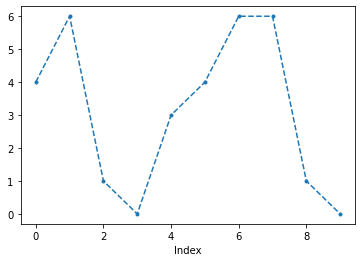

In [80]:
Y.sim(1).plot(alpha = 1) # plots

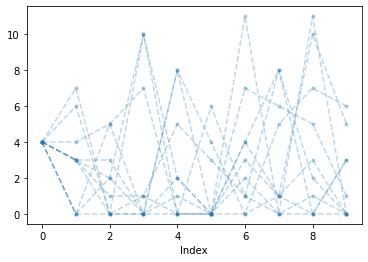

In [81]:
Y.sim(10).plot()

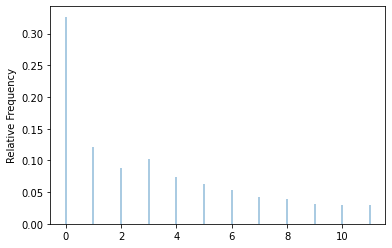

In [82]:
Y[5].sim(10000).plot()

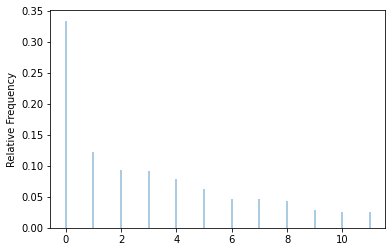

In [83]:
(Y[5] | (Y[4] == 1) ).sim(10000).plot()

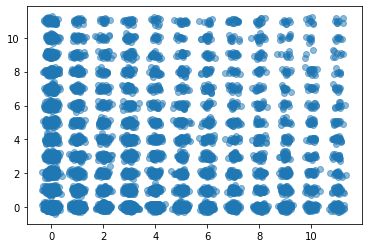

In [84]:
(Y[4] & Y[5]).sim(10000).plot(jitter = True)